## Primeiramente, vamos entender mais sobre o índice Gini:

## O usuário Kilian Batzner disponibilizou uma explicação detalhada em www.kaggle.com/batzner/gini-coefficient-an-intuitive-explanation/notebook

## Vamos explorar seu código para aprender as características dessa métrica.

In [5]:
import scipy.interpolate
import scipy.integrate
import numpy as np
import matplotlib.pyplot as plt

pred = [0.9, 0.3, 0.8, 0.75, 0.65, 0.6, 0.78, 0.7, 0.05, 0.4, 0.4, 0.05, 0.5, 0.1, 0.1]
actual = [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Código por Kilian Batzner

def gini(actual, pred):   
    # A métrica obviamente recebe os targets e as predições
    assert (len(actual) == len(pred)) 
    # Certificaremos-nos que possuem o mesmo comprimento
    all = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float)
    # Fazemos um array numpy chamado all com três colunas: os targets, as predições, e os "índices"
    # (O método .c_() faz concatenação no eixo das colunas)
    all = all[np.lexsort((all[:, 2], -1 * all[:, 1]))]
    # Reordenaremos as linhas segundo o valor da predição utilizando .lexsort().
    totalLosses = all[:, 0].sum()
    # Essa é a soma de todos os targets positivos
    giniSum = all[:, 0].cumsum().sum() / totalLosses
    # .cumsum() fornece um array de soma cumulativa do eixo dos targets.
    # giniSum é a soma do cumulativo dos targets dividido pelo total de targets positivos
    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)

def gini_normalized(actual, pred):
    return gini(actual, pred) / gini(actual, actual)

#### Em outras palavras, estamos ordenando nossas predictions e comparando com o target e trabalhando com a soma dos erros cumulativos.

#### Calculando o GINI para esses valores de teste:

In [6]:
gini_predictions = gini(actual, pred) # Código por Kilian Batzner
gini_max = gini(actual, actual)
ngini= gini_normalized(actual, pred)
print('Gini: %.3f, Max. Gini: %.3f, Normalized Gini: %.3f' % (gini_predictions, gini_max, ngini))

Gini: 0.189, Max. Gini: 0.300, Normalized Gini: 0.630


#### Obtivemos Gini: 0.189, Max. Gini: 0.300, Normalized Gini: 0.630

In [7]:
# Sort the actual values by the predictions -- # Código por Kilian Batzner

data = zip(actual, pred)
sorted_data = sorted(data, key=lambda d: d[1])
sorted_actual = [d[0] for d in sorted_data]
print('Sorted Actual Values', sorted_actual)

Sorted Actual Values [0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1]


#### Vamos entender visualmente:

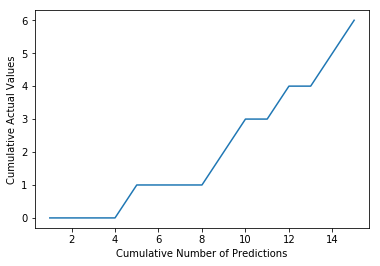

In [10]:
# Sum up the actual values -- # Código por Kilian Batzner
cumulative_actual = np.cumsum(sorted_actual)
cumulative_index = np.arange(1, len(cumulative_actual)+1)

plt.plot(cumulative_index, cumulative_actual)
plt.xlabel('Cumulative Number of Predictions')
plt.ylabel('Cumulative Actual Values')
plt.show()

#### Essa linha azul é análoga à curva de Lorenz utilizada em economia, obtida percorrendo uma população dos mais pobres aos mais ricos (eixo x) e somando o cumulativo de suas rendas (eixo y).
#### Aqui, no entanto, ao invés de percorrer a população de mais pobres aos mais ricos estamos percorrendo a nossas predições partindo dos menores valores rumo aos maiores. Ao invés de somar renda, somamos os valores das predições.
#### Em seguida vamos normalizar os eixos para que partam de 0 a 100% e vamos adicionar a linha de 45º para representar o resultado de chutes aleatórios (análogo à distribuição perfeita de renda).

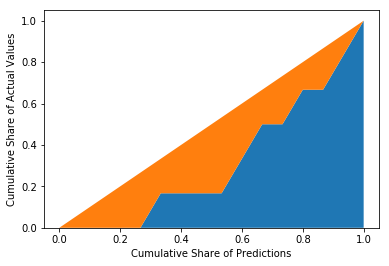

In [11]:
cumulative_actual_shares = cumulative_actual / sum(actual) # Código por Kilian Batzner
cumulative_index_shares = cumulative_index / len(pred)

# Add (0, 0) to the plot
x_values = [0] + list(cumulative_index_shares)
y_values = [0] + list(cumulative_actual_shares)

# Display the 45° line stacked on top of the y values
diagonal = [x - y for (x, y) in zip(x_values, y_values)]

plt.stackplot(x_values, y_values, diagonal)
plt.xlabel('Cumulative Share of Predictions')
plt.ylabel('Cumulative Share of Actual Values')
plt.show()

#### Vamos calcular a área da parte laranja:

In [13]:
fy = scipy.interpolate.interp1d(x_values, y_values)  # Código por Kilian Batzner
blue_area, _ = scipy.integrate.quad(fy, 0, 1, points=x_values)
orange_area = 0.5 - blue_area
print('Orange Area: %.3f' % orange_area)

Orange Area: 0.189


####  O resultado é, não por acaso, idêntico ao índice Gini que havíamos calculado acima.
#### Vamos usar os valores reais dos targets como previsões para obter o Gini máximo:

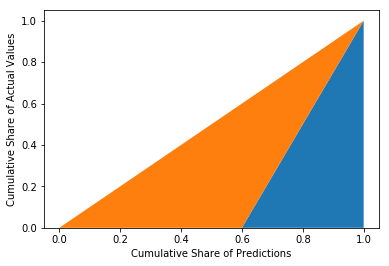

Orange Area: 0.300


In [14]:
cumulative_actual_shares_perfect = np.cumsum(sorted(actual)) / sum(actual)  # Código por Kilian Batzner
y_values_perfect = [0] + list(cumulative_actual_shares_perfect)

# Display the 45° line stacked on top of the y values
diagonal = [x - y for (x, y) in zip(x_values, y_values_perfect)]

plt.stackplot(x_values, y_values_perfect, diagonal)
plt.xlabel('Cumulative Share of Predictions')
plt.ylabel('Cumulative Share of Actual Values')
plt.show()

# Integrate the the curve function
fy = scipy.interpolate.interp1d(x_values, y_values_perfect)
blue_area, _ = scipy.integrate.quad(fy, 0, 1, points=x_values)
orange_area = 0.5 - blue_area
print('Orange Area: %.3f' % orange_area)

#### E o valor máximo foi o mesmo que haviamos calculado acima.

In [15]:
# Dividing both orange areas gives us the Normalized Gini Coefficient:

0.189 / 0.3 

0.63

#### Assim como o Gini normalizado.

# Para entender mais sobre curva ROC e AUC, a fim de compreender o cálculo de GINI por 2 * AUC - 1, vamos recorrer a uma aula do canal Data School no Youtube: https://www.youtube.com/watch?v=OAl6eAyP-yo

## Minhas observações abaixo:


TPR = True Positive Rate = True Positives / All Positives

FPR = False Positive Rate = False Positives / All Negatives

- A curva ROC é um método de avaliar um classificador.

- Plota-se a curva utilizando pontos (TPR, FPR) para todos os limiares (thresholds) de classificação (entre 0 e 1)

- Considerando um triângulo retângulo com catetos compostos por FPR e TPR, uma separação eficiente dos dados dará origem a uma curva que se distancia da hipotenusa.

- Para escolher o classificador (e o limiar, por consequência) utilizaremos AUC, ou Área Abaixo da Curva. 
    - Quanto maior o AUC, melhor
   

Algumas observações muitos importantes:

- ROCs podem ser usadas com três ou mais classes utilizando um approach de "one vs all"

- Escolher o limiar de classificação é uma BUSINESS DECISION: minimizar FPR ou maximizar TPR.

- ROCs são úteis mesmo se a probabilidade do que você estiver prevendo não estiver "calibrada"
    - Esse é o caso do desafio da Porto, dado que 96% dos targets eram '0' no dataset de treino.